### Importa√ß√£o dos dados



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [31]:
# Junta os dados das 4 lojas com coluna "Loja"
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

In [32]:
# Faturamento total
faturamento_total = todas_lojas["Pre√ßo"].sum()
print(f"Faturamento total: R${faturamento_total:.2f}")

# Faturamento por loja
faturamento_por_loja = todas_lojas.groupby("Loja")["Pre√ßo"].sum()
print("\nFaturamento por loja:")
print(faturamento_por_loja)

Faturamento total: R$5871490.79

Faturamento por loja:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Pre√ßo, dtype: float64


### üìä Gr√°fico - An√°lise do faturamento

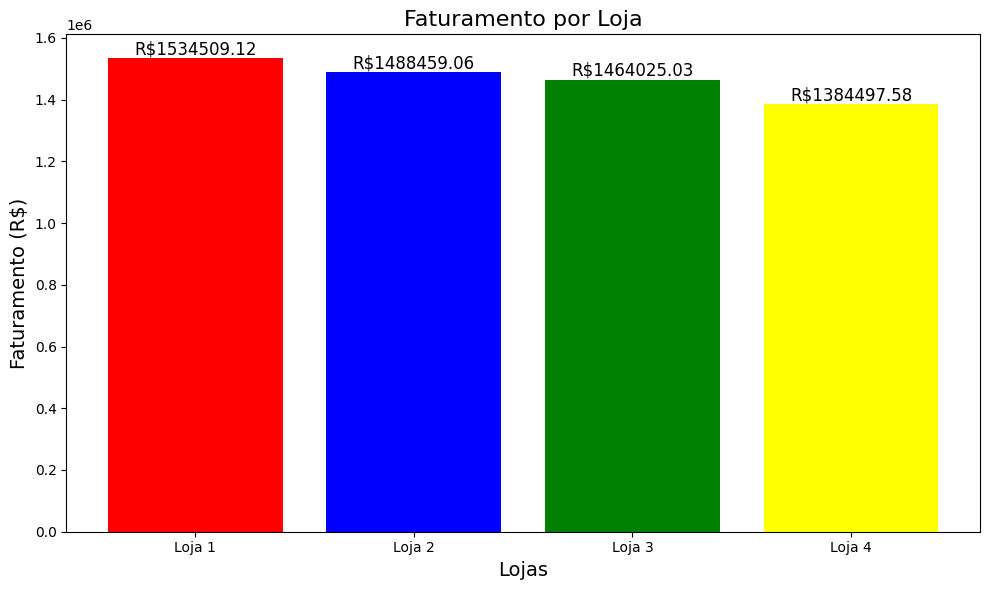

In [34]:
# Importando a biblioteca de gr√°ficos
import matplotlib.pyplot as plt

# Definindo as cores das barras para cada loja
cores = ['red', 'blue', 'green', 'yellow']  # Loja 1 - vermelha, Loja 2 - azul, Loja 3 - verde, Loja 4 - amarela

# Gr√°fico de faturamento por loja
plt.figure(figsize=(10, 6))  # Tamanho do gr√°fico
plt.bar(faturamento_por_loja.index, faturamento_por_loja.values, color=cores)  # Barra para o faturamento por loja

# Adicionando t√≠tulo e labels
plt.title("Faturamento por Loja", fontsize=16)
plt.xlabel("Lojas", fontsize=14)
plt.ylabel("Faturamento (R$)", fontsize=14)

# Exibindo os valores nas barras
for i, v in enumerate(faturamento_por_loja.values):
    plt.text(i, v + 50, f'R${v:.2f}', ha='center', va='bottom', fontsize=12)  # Ajuste do valor acima da barra

# Exibindo o gr√°fico
plt.tight_layout()  # Ajusta o layout para o gr√°fico n√£o cortar as legendas
plt.show()


# 2. Vendas por Categoria


In [35]:
# Junta os dados das 4 lojas com coluna "Loja"
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

In [36]:
# Agrupando os dados por categoria de produto
vendas_por_categoria = todas_lojas.groupby("Categoria do Produto")["Pre√ßo"].sum()

In [37]:
print("Vendas por categoria:")
print(vendas_por_categoria)

Vendas por categoria:
Categoria do Produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: Pre√ßo, dtype: float64


### üìä Gr√°fico - Vendas por Categoria

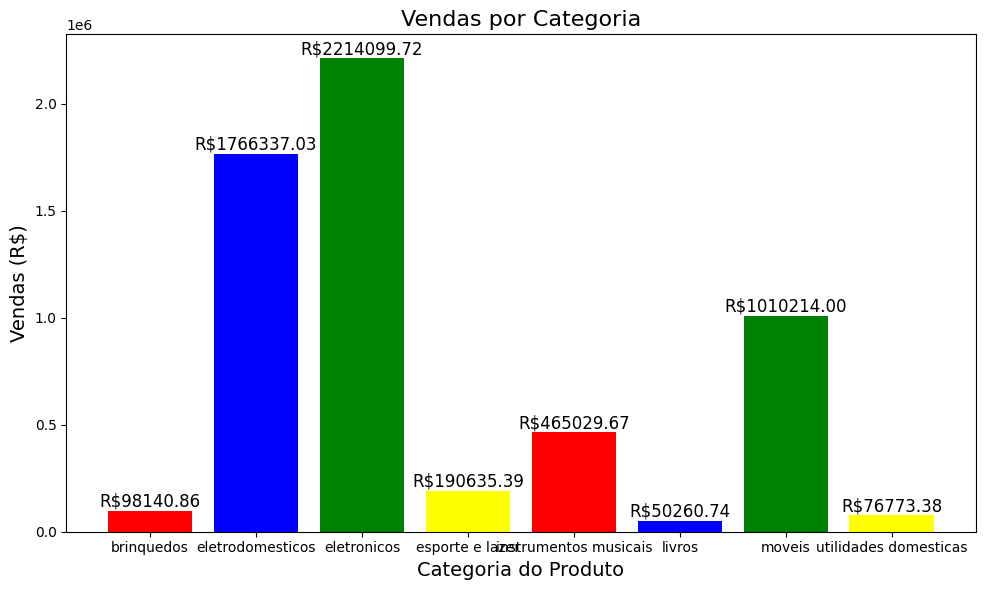

In [38]:
# Importando a biblioteca de gr√°ficos
import matplotlib.pyplot as plt

# Gr√°fico de vendas por categoria
plt.figure(figsize=(10, 6))  # Tamanho do gr√°fico
plt.bar(vendas_por_categoria.index, vendas_por_categoria.values, color=['red', 'blue', 'green', 'yellow'])  # Barra para o faturamento por categoria

# Adicionando t√≠tulo e labels
plt.title("Vendas por Categoria", fontsize=16)
plt.xlabel("Categoria do Produto", fontsize=14)
plt.ylabel("Vendas (R$)", fontsize=14)

# Exibindo os valores nas barras
for i, v in enumerate(vendas_por_categoria.values):
    plt.text(i, v + 50, f'R${v:.2f}', ha='center', va='bottom', fontsize=12)  # Ajuste do valor acima da barra

# Exibindo o gr√°fico
plt.tight_layout()  # Ajusta o layout para o gr√°fico n√£o cortar as legendas
plt.show()


# 3. M√©dia de Avalia√ß√£o das Lojas

In [55]:
# Junta os dados das 4 lojas com coluna "Loja"
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

In [56]:
todas_lojas.columns

Index(['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')

In [57]:
# Calculando a m√©dia das avalia√ß√µes por loja
media_avaliacoes = todas_lojas.groupby("Loja")["Avalia√ß√£o da compra"].mean()

In [58]:
# Exibindo a m√©dia de avalia√ß√µes por loja
print("M√©dia de Avalia√ß√£o por Loja:")
print(media_avaliacoes)

M√©dia de Avalia√ß√£o por Loja:
Loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avalia√ß√£o da compra, dtype: float64


In [59]:
# Exibindo com arredondamento
print("M√©dia de Avalia√ß√£o por Loja (arredondada):")
print(media_avaliacoes.round(2))

M√©dia de Avalia√ß√£o por Loja (arredondada):
Loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avalia√ß√£o da compra, dtype: float64


### üìä Gr√°fico - M√©dia de Avalia√ß√£o das Lojas

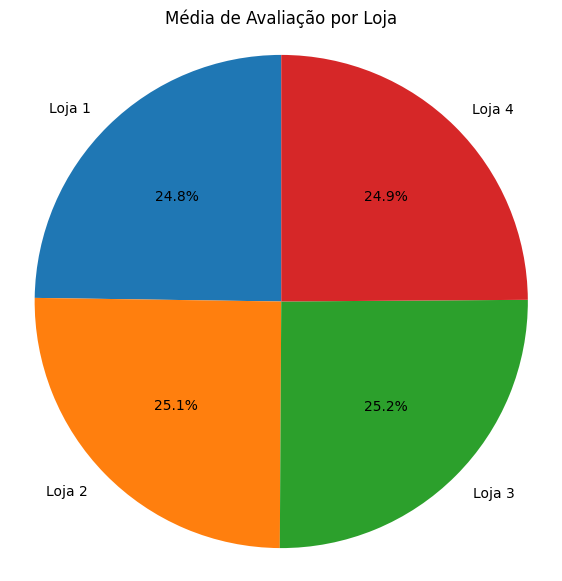

In [60]:
import matplotlib.pyplot as plt

# Plotando o gr√°fico de pizza
plt.figure(figsize=(7, 7))
plt.pie(media_avaliacoes.round(2), labels=media_avaliacoes.index, autopct='%1.1f%%', startangle=90)
plt.title('M√©dia de Avalia√ß√£o por Loja')
plt.axis('equal')  # Deixa o gr√°fico de pizza circular
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [45]:
# Junta os dados das 4 lojas com coluna "Loja"
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

In [46]:
# Calculando o total de vendas por produto
total_vendas = todas_lojas.groupby("Produto")["Quantidade de parcelas"].sum()

In [47]:
# Exibindo os produtos mais vendidos
produtos_mais_vendidos = total_vendas.sort_values(ascending=False)
produtos_mais_vendidos.head()  # Exibe os 5 mais vendidos

Produto
Secadora de roupas    649
C√¥moda                627
Pandeiro              625
Bicicleta             614
Celular Plus X42      611
Name: Quantidade de parcelas, dtype: int64

In [48]:
# Exibindo os produtos menos vendidos
produtos_menos_vendidos = total_vendas.sort_values(ascending=True)
produtos_menos_vendidos.head()  # Exibe os 5 menos vendidos

Produto
Smartwatch        432
Jogo de copos     435
Celular ABXY      447
Dinossauro Rex    458
Mesa de centro    469
Name: Quantidade de parcelas, dtype: int64

### üìä Gr√°fico - Produtos Mais e Menos Vendidos

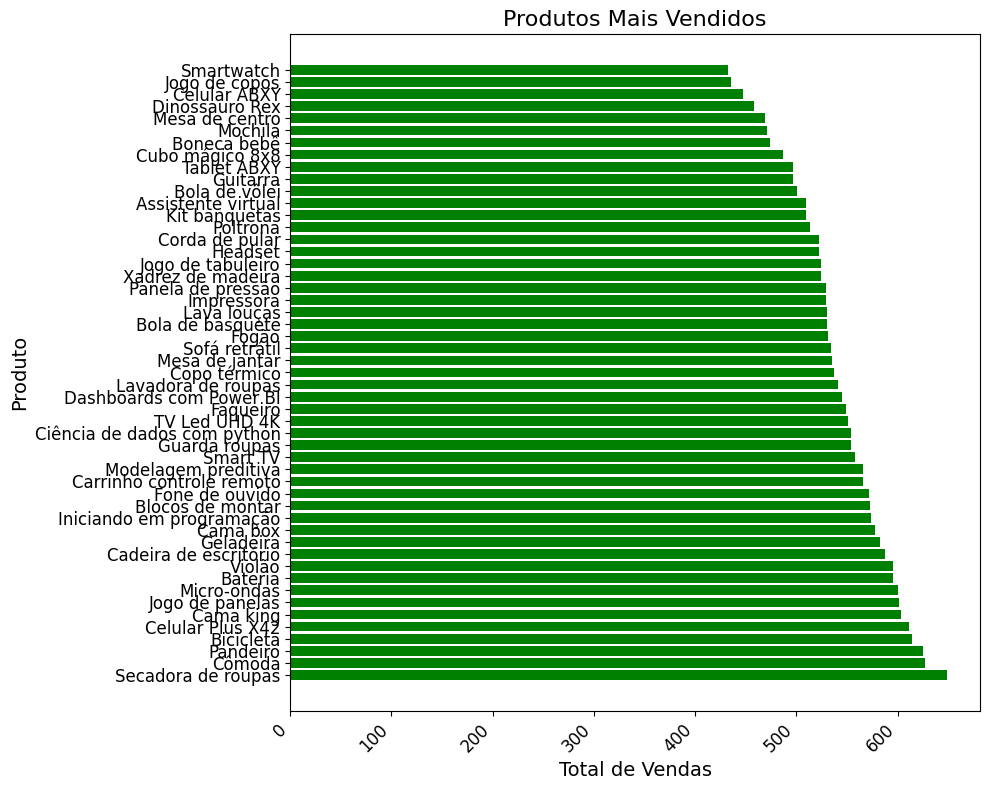

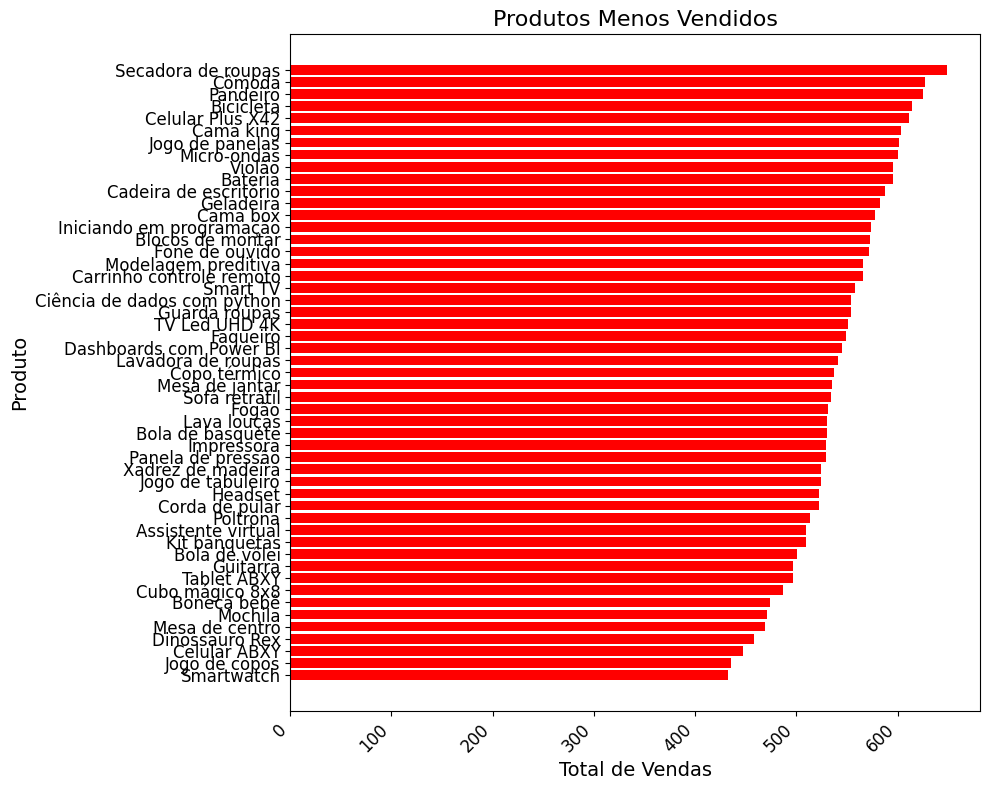

In [50]:
plt.figure(figsize=(10, 8))  # Aumenta o tamanho da figura
plt.barh(produtos_mais_vendidos.index, produtos_mais_vendidos.values, color='green')
plt.title("Produtos Mais Vendidos", fontsize=16)
plt.xlabel("Total de Vendas", fontsize=14)
plt.ylabel("Produto", fontsize=14)

# Ajusta a rota√ß√£o dos r√≥tulos para melhorar a leitura
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotaciona os r√≥tulos do eixo X
plt.yticks(fontsize=12)  # Tamanho da fonte dos r√≥tulos do eixo Y

plt.tight_layout()  # Ajusta os elementos do gr√°fico para n√£o ficarem cortados
plt.show()

plt.figure(figsize=(10, 8))  # Aumenta o tamanho da figura
plt.barh(produtos_menos_vendidos.index, produtos_menos_vendidos.values, color='red')
plt.title("Produtos Menos Vendidos", fontsize=16)
plt.xlabel("Total de Vendas", fontsize=14)
plt.ylabel("Produto", fontsize=14)

# Ajusta a rota√ß√£o dos r√≥tulos para melhorar a leitura
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotaciona os r√≥tulos do eixo X
plt.yticks(fontsize=12)  # Tamanho da fonte dos r√≥tulos do eixo Y

plt.tight_layout()  # Ajusta os elementos do gr√°fico para n√£o ficarem cortados
plt.show()


# 5. Frete M√©dio por Loja


In [51]:
# Junta os dados das 4 lojas com coluna "Loja"
loja["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

In [52]:
# Calculando o frete m√©dio por loja
frete_medio = todas_lojas.groupby("Loja")["Frete"].mean()

In [53]:
# Exibindo o frete m√©dio por loja
frete_medio

Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64

### üìä Gr√°fico - Frete M√©dio por Loja


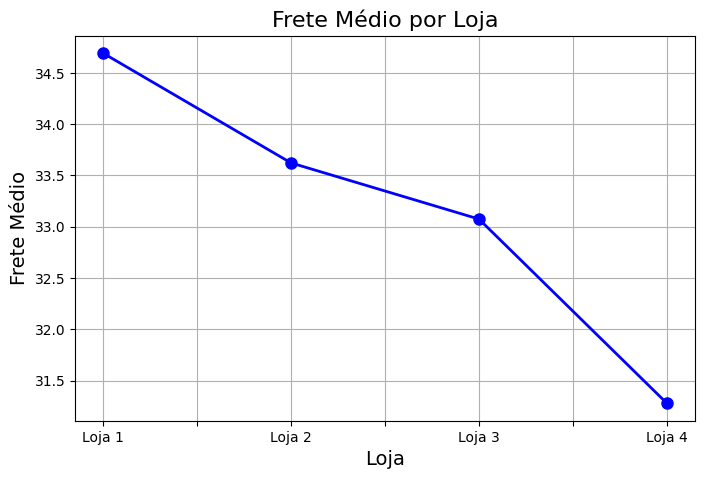

In [54]:
import matplotlib.pyplot as plt

# Supondo que 'frete_medio' j√° esteja calculado, como mostrado antes
# Aqui, 'frete_medio' √© um Series com o frete m√©dio por loja
# Se voc√™ j√° tem 'frete_medio' como uma vari√°vel que tem os valores das lojas

# Criando o gr√°fico de linha
plt.figure(figsize=(8, 5))
frete_medio.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Definindo t√≠tulo e r√≥tulos
plt.title('Frete M√©dio por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Frete M√©dio', fontsize=14)

# Exibindo o gr√°fico
plt.grid(True)
plt.show()


# Relat√≥rio Final ‚Äì An√°lise das Lojas


### **Introdu√ß√£o**
Este relat√≥rio tem como objetivo analisar o desempenho das quatro lojas do Sr. Jo√£o com base em dados de vendas, avalia√ß√µes, categorias de produtos e custos de frete. O intuito √© identificar qual loja apresenta os melhores resultados e qual delas deve ser vendida, considerando os pontos fortes e fracos de cada uma.

### **Desenvolvimento**

#### üî∏ Faturamento Total
O faturamento total das quatro lojas foi de **R$ 5.871.490,79** . Quando analisamos o faturamento individual:

- **Loja 1**: teve o maior faturamento: **R$ 1.534.509,12**

- **Loja 2**: veio em seguida: **R$ 1.488.459,06**

- **Loja 3**: **R$ 1.464.025,03**

- **Loja 4**: teve o menor faturamento: **R$ 1.384.497,58**

#### üî∏ Vendas por Categoria
As categorias mais lucrativas foram:

- **Eletr√¥nicos** (R$ 2.214.099,72)

- **Eletrodom√©sticos** (R$ 1.766.337,03)

As menos lucrativas foram:

- **Livros** (R$ 50.260,74)

- **Utilidades dom√©sticas** (R$ 76.773,38)

#### üî∏ Avalia√ß√£o dos Clientes
M√©dia de avalia√ß√£o por loja (em estrelas):
- **Loja 3**: 4.05 ‚≠ê (melhor avalia√ß√£o)
- **Loja 2**: 4.04 ‚≠ê
- **Loja 4**: 4.00 ‚≠ê
- **Loja 1**: 3.98 ‚≠ê (pior avalia√ß√£o)

#### üî∏ Produtos Mais Vendidos
Os produtos com maior quantidade de vendas foram:
- **Secadora de roupas**: 649 unidades
- **C√¥moda**: 627 unidades

#### üî∏ Produtos Menos Vendidos
Os produtos com menos vendas foram:
- **Smartwatch**: 432 unidades
- **Jogo de copos**: 435 unidades

#### üî∏ Frete M√©dio por Loja

- **Loja 1**: R$ 34,69 (frete mais caro)

- **Loja 2**: R$ 33,62

- **Loja 3**: R$ 33,07

- **Loja 4**: R$ 31,27 (frete mais barato)

### **Conclus√£o**

Com base em todos os dados analisados, a **Loja 4** apresenta o **pior desempenho geral**. Ela teve o **menor faturamento** entre todas as lojas e tamb√©m uma avalia√ß√£o de clientes **inferior √† Loja 2 e Loja 3**, mesmo com o **frete mais barato**.

J√° as lojas **2 e 3** se destacaram com boas avalia√ß√µes e faturamentos altos. A **Loja 1**, apesar de ter o maior faturamento, teve a **pior m√©dia de avalia√ß√£o** e o **frete mais caro**, o que pode impactar a satisfa√ß√£o do cliente a longo prazo.

**Recomenda√ß√£o:** Vender a **Loja 4**, pois √© a que menos se destaca em todos os crit√©rios analisados e possui desempenho inferior √†s demais.
